## Import related libraries

In [330]:
import cv2, os
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

## Define constants

In [331]:
IMG_LEN = 32 * 32
CARAMBULA = 0
LYCHEE = 1
PEAR = 2
NUM_OF_NEURONS = 20
TRAINING_SAMPLE = 350
VLD_SAMPLE = 490 - TRAINING_SAMPLE
TESTING_SAMPLE = 166
LEARNING_RATE = 1e-1

## Read the images and perform PCA

In [332]:
carambula_img = os.listdir('Data_test/Carambula')
lychee_img = os.listdir('Data_test/Lychee')
pear_img = os.listdir('Data_test/Pear')
carambula_test = np.zeros((len(carambula_img), IMG_LEN))
lychee_test = np.zeros((len(lychee_img), IMG_LEN))
pear_test = np.zeros((len(pear_img), IMG_LEN))

for i in range(len(carambula_img)):
    carambula_test[i] = cv2.imread('Data_test/Carambula/' + carambula_img[i], cv2.IMREAD_GRAYSCALE).flatten()
    lychee_test[i] = cv2.imread('Data_test/Lychee/' + lychee_img[i], cv2.IMREAD_GRAYSCALE).flatten()
    pear_test[i] = cv2.imread('Data_test/Pear/' + pear_img[i], cv2.IMREAD_GRAYSCALE).flatten()

# carambula_test = pca.fit_transform(carambula_test)
# lychee_test = pca.fit_transform(lychee_test)
# pear_test = pca.fit_transform(pear_test)

carambula_img = os.listdir('Data_train/Carambula')
lychee_img = os.listdir('Data_train/Lychee')
pear_img = os.listdir('Data_train/Pear')
carambula_train = np.zeros((TRAINING_SAMPLE, IMG_LEN))
lychee_train = np.zeros((TRAINING_SAMPLE, IMG_LEN))
pear_train = np.zeros((TRAINING_SAMPLE, IMG_LEN))
carambula_vld = np.zeros((490 - TRAINING_SAMPLE, IMG_LEN))
lychee_vld = np.zeros((490 - TRAINING_SAMPLE, IMG_LEN))
pear_vld = np.zeros((490 - TRAINING_SAMPLE, IMG_LEN))

for i in range(TRAINING_SAMPLE):
    carambula_train[i] = cv2.imread('Data_train/Carambula/' + carambula_img[i], cv2.IMREAD_GRAYSCALE).flatten()
    lychee_train[i] = cv2.imread('Data_train/Lychee/' + lychee_img[i], cv2.IMREAD_GRAYSCALE).flatten()
    pear_train[i] = cv2.imread('Data_train/Pear/' + pear_img[i], cv2.IMREAD_GRAYSCALE).flatten()

for j in range(490 - TRAINING_SAMPLE):
    carambula_vld[j] = cv2.imread('Data_train/Carambula/' + carambula_img[TRAINING_SAMPLE + j], cv2.IMREAD_GRAYSCALE).flatten()
    lychee_vld[j] = cv2.imread('Data_train/Lychee/' + lychee_img[TRAINING_SAMPLE + j], cv2.IMREAD_GRAYSCALE).flatten()
    pear_vld[j] = cv2.imread('Data_train/Pear/' + pear_img[TRAINING_SAMPLE + j], cv2.IMREAD_GRAYSCALE).flatten()


carambula_tv = np.concatenate((carambula_train, carambula_vld))
lychee_tv = np.concatenate((lychee_train, lychee_vld))
pear_tv = np.concatenate((pear_train, pear_vld))
np.random.shuffle(carambula_tv)
np.random.shuffle(lychee_tv)
np.random.shuffle(pear_tv)
carambula_train = carambula_tv[:TRAINING_SAMPLE]
carambula_vld = carambula_tv[TRAINING_SAMPLE:]
lychee_train = lychee_tv[:TRAINING_SAMPLE]
lychee_vld = lychee_tv[TRAINING_SAMPLE:]
pear_train = pear_tv[:TRAINING_SAMPLE]
pear_vld = pear_tv[TRAINING_SAMPLE:]

# print(carambula_train.shape, carambula_vld.shape, carambula_test.shape)
# print(lychee_train.shape, lychee_vld.shape, lychee_test.shape)
# print(pear_train.shape, pear_vld.shape, pear_test.shape)

training_set = np.concatenate((carambula_train, lychee_train, pear_train))
vld_set = np.concatenate((carambula_vld, lychee_vld, pear_vld))
testing_set = np.concatenate((carambula_test, lychee_test, pear_test))
# print(training_set.shape)
# print(vld_set.shape)
# print(testing_set.shape)

pca = PCA(n_components=2)
training_set = pca.fit_transform(training_set)
vld_set = pca.transform(vld_set)
testing_set = pca.transform(testing_set)

print(training_set.shape)
print(vld_set.shape)
print(testing_set.shape)

# append the gt
new_training_set = []
for i in range(TRAINING_SAMPLE):
    temp = list(training_set[i])
    temp.append(CARAMBULA)
    new_training_set.append(temp)

for i in range(TRAINING_SAMPLE, 2 * TRAINING_SAMPLE):
    temp = list(training_set[i])
    temp.append(LYCHEE)
    new_training_set.append(temp)

for i in range(2 * TRAINING_SAMPLE, 3 * TRAINING_SAMPLE):
    temp = list(training_set[i])
    temp.append(PEAR)
    new_training_set.append(temp)

training_set = np.array(new_training_set)

new_vld_set = []
for i in range(VLD_SAMPLE):
    temp = list(vld_set[i])
    temp.append(CARAMBULA)
    new_vld_set.append(temp)

for i in range(VLD_SAMPLE, 2 * VLD_SAMPLE):
    temp = list(vld_set[i])
    temp.append(LYCHEE)
    new_vld_set.append(temp)

for i in range(2 * VLD_SAMPLE, 3 * VLD_SAMPLE):
    temp = list(vld_set[i])
    temp.append(PEAR)
    new_vld_set.append(temp)
vld_set = np.array(new_vld_set)

new_testing_set = []
for i in range(TESTING_SAMPLE):
    temp = list(testing_set[i])
    temp.append(CARAMBULA)
    new_testing_set.append(temp)

for i in range(TESTING_SAMPLE, 2 * TESTING_SAMPLE):
    temp = list(testing_set[i])
    temp.append(LYCHEE)
    new_testing_set.append(temp)

for i in range(2 * TESTING_SAMPLE, 3 * TESTING_SAMPLE):
    temp = list(testing_set[i])
    temp.append(PEAR)
    new_testing_set.append(temp)
testing_set = np.array(new_testing_set)

training_set = np.expand_dims(training_set, axis=2)
vld_set = np.expand_dims(vld_set, axis=2)
testing_set = np.expand_dims(testing_set, axis=2)

print(training_set.shape)
print(vld_set.shape)
print(testing_set.shape)



(1050, 2)
(420, 2)
(498, 2)
(1050, 3, 1)
(420, 3, 1)
(498, 3, 1)


## Define useful functions

In [333]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def softmax(inputs):
    return np.exp(inputs) / np.sum(np.exp(inputs))

def diff_sigmoid(t):
    return sigmoid(t) * (1 - sigmoid(t))

## Define network

In [334]:
class FC2():
    def __init__(self):
        self.bias = np.random.randn()
        self.W1 = np.random.randn(NUM_OF_NEURONS, 3) * np.sqrt(1. / 3)
        self.W2 = np.random.randn(3, NUM_OF_NEURONS) * np.sqrt(1. / 3)
        self.y0 = np.zeros((3, 1))
        self.y1 = np.zeros((NUM_OF_NEURONS, 1))
        self.y2 = np.zeros((NUM_OF_NEURONS, 1))
    def update_y0(self, new_y0: np.ndarray):
        self.y0 = new_y0
    def update_y1(self, new_y1: np.ndarray):
        self.y1 = new_y1
    def update_y2(self, new_y2: np.ndarray):
        self.y2 = new_y2
    def update_W1(self, dW1, learning_rate=0.01):
        self.W1 = self.W1 - learning_rate * dW1
    def update_W2(self, dW2, learning_rate=0.01):
        self.W2 = self.W2 - learning_rate * dW2

In [335]:
def forward2(network: FC2, data: np.ndarray):
    # print(f'original data = {data}')
    gt = int(data[2])
    data = data[:2]
    # print(f'data = {data}, \ndata shape = {data.shape}, gt = {gt}')

    y0 = np.concatenate((data, np.array([[network.bias]])))
    network.update_y0(y0)
    # print(f'y0 = {y0}')
    # print(f'y0.shape = {y0.shape}')
    y1 = np.matmul(network.W1, y0)
    network.update_y1(y1)
    # print(f'y1.shape = {y1.shape}')
    y2 = sigmoid(y1)
    network.update_y2(y2)
    # print(f'y2.shape = {y2.shape}')
    y3 = np.matmul(network.W2, y2)
    # print(f'y3.shape = {y3.shape}')
    y = softmax(y3)
    # print(f'y.shape = {y.shape}')
    # print(f'y = {y}')
    return y

def inference2(network: FC2, data: np.ndarray):
    data = data[:2]
    # print(f'data = {data}, shape = {data.shape}')
    y0 = np.concatenate((data, np.array([[network.bias]])))
    y1 = np.matmul(network.W1, y0)
    y2 = sigmoid(y1)
    y3 = np.matmul(network.W2, y2)
    y = softmax(y3)
    return y


def f_loss(predict: np.ndarray, gt:int):
    target = np.zeros((3, 1))
    target[gt] = 1
    # print(f'target = {target}')
    return -np.sum(np.multiply(predict, np.log(target + 1e-10)))

def b_loss(predict: np.ndarray, gt:int):
    target = np.zeros((3, 1))
    target[gt][0] = 1
    # print(f'predict = {predict}')
    # print(f'target = {target}')
    return predict - target

def backward2(network: FC2, b_loss: np.ndarray):
    # print(f'b_loss shape = {b_loss.shape}, y2 T shape = {network.y2.T.shape}')
    dy = b_loss
    # print(f'dy = {dy}')
    # print(f'network.y2.T = {network.y2.T}')
    dW2 = np.matmul(dy, network.y2.T)
    dy2 = np.matmul(network.W2.T, dy)
    dy1 = np.multiply(dy2, diff_sigmoid(network.y1))
    dW1 = np.matmul(dy1, network.y0.T)
    # print(f'shape of dy, dy1, dy2, dW1, dW2 = {dy.shape}, {dy1.shape}, {dy2.shape}, {dW1.shape}, {dW2.shape}')
    # print(f'dW1 = {dW1}')
    return {'dW1':dW1, 'dW2': dW2}

def update_W_2(network: FC2, gradient: dict):
    dW1, dW2 = gradient['dW1'], gradient['dW2']
    network.update_W1(dW1=dW1, learning_rate=LEARNING_RATE)
    network.update_W2(dW2=dW2, learning_rate=LEARNING_RATE)



C:\Users\leosh\AppData\Local\Temp/ipykernel_904/1244640247.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


epoch =   1, training accuracy = 0.665, validation accuracy = 0.698
epoch =   2, training accuracy = 0.668, validation accuracy = 0.667
epoch =   3, training accuracy = 0.654, validation accuracy = 0.669
epoch =   4, training accuracy = 0.632, validation accuracy = 0.664
epoch =   5, training accuracy = 0.656, validation accuracy = 0.648
epoch =   6, training accuracy = 0.637, validation accuracy = 0.648
epoch =   7, training accuracy = 0.674, validation accuracy = 0.562
epoch =   8, training accuracy = 0.658, validation accuracy = 0.640
epoch =   9, training accuracy = 0.639, validation accuracy = 0.676
epoch =  10, training accuracy = 0.661, validation accuracy = 0.617
epoch =  11, training accuracy = 0.640, validation accuracy = 0.626
epoch =  12, training accuracy = 0.658, validation accuracy = 0.650
epoch =  13, training accuracy = 0.646, validation accuracy = 0.648
epoch =  14, training accuracy = 0.660, validation accuracy = 0.676
epoch =  15, training accuracy = 0.670, validati

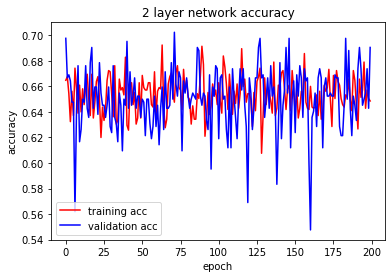

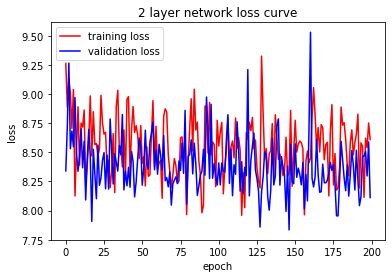

In [336]:
network2 = FC2()
def train2(epoch=1):
    training_acc = []
    vld_acc = []
    training_loss = []
    vld_loss = []
    for e in range(epoch):
        tmp_loss = 0
        correct = 0
        for _ in range(TRAINING_SAMPLE * 3):
            idx = np.random.randint(0, 3 * TRAINING_SAMPLE)
            data = training_set[idx]
            predicted_prob = forward2(network=network2, data=data)
            # print(f'predicted_prob = {predicted_prob}, shape = {predicted_prob.shape}')

            gt = int(data[2])
            predicted_result = np.argmax(predicted_prob)
            if predicted_result == gt:
                correct += 1

            forward_loss = f_loss(predict=predicted_prob, gt=int(data[2]))
            tmp_loss += forward_loss
            # print(f'forward_loss = {forward_loss}')
            backward_loss = b_loss(predict=predicted_prob, gt=int(data[2]))
            # print(f'backward_loss = {backward_loss}, shape = {backward_loss.shape}')
            gradient = backward2(network=network2, b_loss=backward_loss)
            update_W_2(network=network2, gradient=gradient)

        training_loss.append(tmp_loss)
        training_acc.append(correct / (TRAINING_SAMPLE * 3))

        correct = 0
        data_num = 0
        tmp_loss = 0
        for data in vld_set:
            data_num += 1
            predicted_prob = inference2(network=network2, data=data)
            forward_loss = f_loss(predict=predicted_prob, gt=int(data[2]))
            tmp_loss += forward_loss
            predicted_result = np.argmax(predicted_prob)
            gt = int(data[2])
            if predicted_result == gt:
                correct += 1
                
        vld_acc.append(correct / data_num)
        vld_loss.append(tmp_loss)

        print(f'epoch = {(e + 1):3d}, training accuracy = {training_acc[e]:.3f}, validation accuracy = {vld_acc[e]:.3f}')

    correct = 0
    data_num = 0
    for data in testing_set:
        data_num += 1
        predicted_prob = inference2(network=network2, data=data)
        predicted_result = np.argmax(predicted_prob)
        gt = int(data[2])
        if predicted_result == gt:
            correct += 1
            
    print(f'final accuracy = {correct / data_num}')
    
    x = np.arange(epoch)        
    training_acc = np.array(training_acc)
    vld_acc = np.array(vld_acc)
    training_loss = np.array(training_loss) / ((TRAINING_SAMPLE * 3))
    vld_loss = np.array(vld_loss) / (VLD_SAMPLE * 3)

    plt.plot(x, training_acc, 'r', label='training acc')
    plt.plot(x, vld_acc, 'b', label='validation acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('2 layer network accuracy')
    plt.legend()
    plt.savefig('accuracy_2_layer.png')
    plt.show()

    plt.plot(x, training_loss, 'r', label='training loss')
    plt.plot(x, vld_loss, 'b', label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('2 layer network loss curve')
    plt.legend()
    plt.savefig('loss_curve_2_layer.png')
    plt.show()

train2(200)

## Define 3 layer network

In [337]:
class FC3():
    def __init__(self):
        self.bias = np.random.randn()
        self.W1 = np.random.randn(NUM_OF_NEURONS, 3) * np.sqrt(1. / 3)
        self.W2 = np.random.randn(NUM_OF_NEURONS, NUM_OF_NEURONS) * np.sqrt(1. / 3)
        self.W3 = np.random.randn(3, NUM_OF_NEURONS) * np.sqrt(1. / 3)
        self.y0 = np.zeros((3, 1))
        self.y1 = np.zeros((NUM_OF_NEURONS, 1))
        self.y2 = np.zeros((NUM_OF_NEURONS, 1))
        self.y3 = np.zeros((NUM_OF_NEURONS, 1))
        self.y4 = np.zeros((NUM_OF_NEURONS, 1))
        self.y5 = np.zeros((3, 1))
    def update_y0(self, new_y0: np.ndarray):
        self.y0 = new_y0
    def update_y1(self, new_y1: np.ndarray):
        self.y1 = new_y1
    def update_y2(self, new_y2: np.ndarray):
        self.y2 = new_y2
    def update_y3(self, new_y3: np.ndarray):
        self.y3 = new_y3
    def update_y4(self, new_y4: np.ndarray):
        self.y4 = new_y4
    def update_y5(self, new_y5: np.ndarray):
        self.y5 = new_y5
    def update_W1(self, dW1, learning_rate=0.01):
        self.W1 = self.W1 - learning_rate * dW1
    def update_W2(self, dW2, learning_rate=0.01):
        self.W2 = self.W2 - learning_rate * dW2
    def update_W3(self, dW3, learning_rate=0.01):
        self.W3 = self.W3 - learning_rate * dW3

In [338]:
def forward3(network: FC3, data:np.ndarray):
    gt = int(data[2])
    data = data[:2]
    # print(f'data = {data}, \ndata shape = {data.shape}, gt = {gt}')

    y0 = np.concatenate((data, np.array([[network.bias]])))
    network.update_y0(y0)
    y1 = np.matmul(network.W1, y0)
    network.update_y1(y1)
    y2 = sigmoid(y1)
    network.update_y2(y2)
    y3 = np.matmul(network.W2, y2)
    network.update_y3(y3)
    y4 = sigmoid(y3)
    network.update_y4(y4)
    y5 = np.matmul(network.W3, y4)
    network.update_y5(y5)
    y = softmax(y5)
    return y

def backward3(network: FC3, b_loss: np.ndarray):
    # print(f'type of network = {type(network)}')
    dy = b_loss
    # print(f'dy.shape = {dy.shape}, network.y4.shape = {network.y4.shape}')
    dW3 = np.matmul(dy, network.y4.T)
    dy4 = np.matmul(network.W3.T, dy)
    dy3 = np.multiply(dy4, diff_sigmoid(network.y3))
    dW2 = np.matmul(dy3, network.y2.T)
    dy2 = np.matmul(network.W2.T, dy3)
    dy1 = np.multiply(dy2, diff_sigmoid(network.y1))
    dW1 = np.matmul(dy1, network.y0.T)
    return {'dW3': dW3, 'dW2': dW2, 'dW1': dW1}

def update_W_3(network: FC3, gradient: dict):
    dW1, dW2, dW3 = gradient['dW1'], gradient['dW2'], gradient['dW3']
    network.update_W1(dW1=dW1, learning_rate=LEARNING_RATE)
    network.update_W2(dW2=dW2, learning_rate=LEARNING_RATE)
    network.update_W3(dW3=dW3, learning_rate=LEARNING_RATE)

def inference3(network: FC3, data:np.ndarray):
    data = data[:2]
    # print(f'data = {data}, \ndata shape = {data.shape}, gt = {gt}')

    y0 = np.concatenate((data, np.array([[network.bias]])))
    y1 = np.matmul(network.W1, y0)
    y2 = sigmoid(y1)
    y3 = np.matmul(network.W2, y2)
    y4 = sigmoid(y3)
    y5 = np.matmul(network.W3, y4)
    y = softmax(y5)
    return y

C:\Users\leosh\AppData\Local\Temp/ipykernel_904/1244640247.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


epoch =   1, training accuracy = 0.619, validation accuracy = 0.624
epoch =   2, training accuracy = 0.646, validation accuracy = 0.624
epoch =   3, training accuracy = 0.694, validation accuracy = 0.712
epoch =   4, training accuracy = 0.710, validation accuracy = 0.671
epoch =   5, training accuracy = 0.707, validation accuracy = 0.745
epoch =   6, training accuracy = 0.690, validation accuracy = 0.745
epoch =   7, training accuracy = 0.717, validation accuracy = 0.760
epoch =   8, training accuracy = 0.762, validation accuracy = 0.764
epoch =   9, training accuracy = 0.720, validation accuracy = 0.707
epoch =  10, training accuracy = 0.701, validation accuracy = 0.781
epoch =  11, training accuracy = 0.736, validation accuracy = 0.688
epoch =  12, training accuracy = 0.746, validation accuracy = 0.681
epoch =  13, training accuracy = 0.732, validation accuracy = 0.707
epoch =  14, training accuracy = 0.703, validation accuracy = 0.710
epoch =  15, training accuracy = 0.727, validati

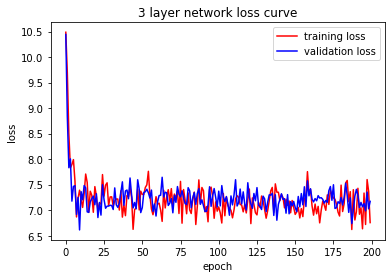

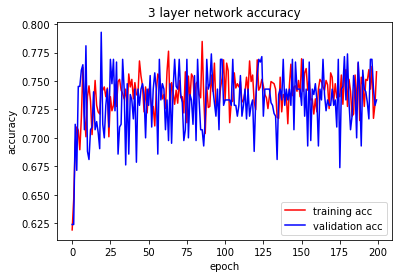

In [339]:
network3 = FC3()
def train3(epoch=1):
    training_loss = []
    vld_loss = []
    vld_acc = []
    training_acc = []

    for e in range(epoch):
        tmp_loss = 0

        correct = 0
        data_num = 0
        for _ in range(TRAINING_SAMPLE * 3):
            data_num += 1
            idx = np.random.randint(0, 3 * TRAINING_SAMPLE)
            data = training_set[idx]
            predicted_prob = forward3(network=network3, data=data)
            
            predicted_result = np.argmax(predicted_prob)
            gt = int(data[2])
            if predicted_result == gt:
                correct += 1
                
            # print(f'predicted_prob = {predicted_prob}, shape = {predicted_prob.shape}')
            forward_loss = f_loss(predict=predicted_prob, gt=int(data[2]))
            backward_loss = b_loss(predict=predicted_prob, gt=int(data[2]))
            # print(f'backward_loss = {backward_loss}, shape = {backward_loss.shape}')
            gradient = backward3(network=network3, b_loss=backward_loss)
            update_W_3(network=network3, gradient=gradient)
            # print(gradient)
            tmp_loss += forward_loss
        
        training_acc.append(correct / data_num)
        training_loss.append(tmp_loss)
        
        correct = 0
        data_num = 0
        tmp_loss = 0
        for data in vld_set:
            data_num += 1
            predicted_prob = inference3(network=network3, data=data)
            forward_loss = f_loss(predict=predicted_prob, gt=int(data[2]))
            tmp_loss += forward_loss
            predicted_result = np.argmax(predicted_prob)
            gt = int(data[2])
            if predicted_result == gt:
                correct += 1
        vld_acc.append(correct / data_num)
        vld_loss.append(tmp_loss)
        print(f'epoch = {(e + 1):3d}, training accuracy = {training_acc[e]:.3f}, validation accuracy = {vld_acc[e]:.3f}')

        # print(f'epoch = {(e + 1):3d}, validation accuracy = {(correct / data_num * 100):.3f}%')
        # vld_acc.append(correct / data_num)

   
    correct = 0
    data_num = 0
    for data in testing_set:
        data_num += 1
        predicted_prob = inference3(network=network3, data=data)
        predicted_result = np.argmax(predicted_prob)
        gt = int(data[2])
        if predicted_result == gt:
            correct += 1
    print(f'final accuracy = {(correct / data_num):.3f}%')
    
    x = np.arange(epoch)        
    # test_acc = np.array(test_acc)
    # vld_acc = np.array(vld_acc)
    training_loss = np.array(training_loss) / ((TRAINING_SAMPLE * 3))
    vld_loss = np.array(vld_loss) / ((VLD_SAMPLE * 3))
    vld_acc = np.array(vld_acc)
    training_acc = np.array(training_acc)
    plt.plot(x, training_loss, 'r', label='training loss')
    plt.plot(x, vld_loss, 'b', label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('3 layer network loss curve')
    plt.legend()
    plt.savefig('loss_curve_3_layer.png')
    plt.show()

    plt.plot(x, training_acc, 'r', label='training acc')
    plt.plot(x, vld_acc, 'b', label='validation acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('3 layer network accuracy')
    plt.legend()
    plt.savefig('accuracy_3_layer.png')
    plt.show()

train3(200)

## Plot decision region

(498, 2)
(2, 1)
data=(124416, 2)


C:\Users\leosh\AppData\Local\Temp/ipykernel_904/1244640247.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


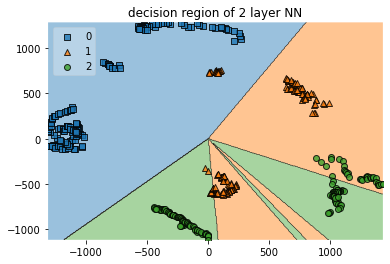

In [340]:
class classifier2():
    def __init__(self, network: FC2):
        self.network = network
    def predict(self, data):
        print(f'data={data.shape}')
        L = []
        for d in data:
            L.append(np.argmax(inference2(network=self.network, data=np.expand_dims(d, axis=1))))
        return np.array(L)

dataset = testing_set

clf2 = classifier2(network=network2)
X = np.squeeze(dataset[:, :2, :], axis=2)
print(X.shape)
y = np.squeeze(dataset[:, 2, :], axis=1).astype(int)
# print(y)
print(np.expand_dims(X[5], axis=1).shape)
# print(clf2.predict(X[200]))
plot_decision_regions(X=X, y=y, clf=clf2, legend=2)
plt.title('decision region of 2 layer NN')
plt.savefig('dr_2_layer.png')
plt.show()

(498, 2)
(2, 1)
data=(124416, 2)


C:\Users\leosh\AppData\Local\Temp/ipykernel_904/1244640247.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


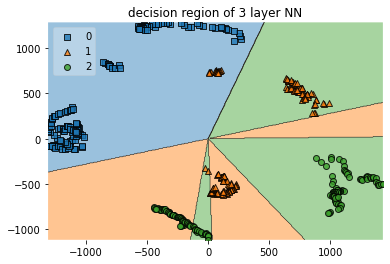

In [341]:
class classifier3():
    def __init__(self, network: FC3):
        self.network = network
    def predict(self, data):
        print(f'data={data.shape}')
        L = []
        for d in data:
            L.append(np.argmax(inference3(network=self.network, data=np.expand_dims(d, axis=1))))
        return np.array(L)

dataset = testing_set

clf2 = classifier3(network=network3)
X = np.squeeze(dataset[:, :2, :], axis=2)
print(X.shape)
y = np.squeeze(dataset[:, 2, :], axis=1).astype(int)
# print(y)
print(np.expand_dims(X[5], axis=1).shape)
# print(clf2.predict(X[200]))
plot_decision_regions(X=X, y=y, clf=clf2, legend=2)
plt.title('decision region of 3 layer NN')
plt.savefig('dr_3_layer.png')
plt.show()